In [ ]:
Project Overview:
This project aims to predict the number of wins for a baseball team in the 2015 season based on performance data 
from the 2014 Major League Baseball season. The dataset contains 16 features, such as runs, hits, home runs, strikeouts, 
and earned run averages, among others.

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None
                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000

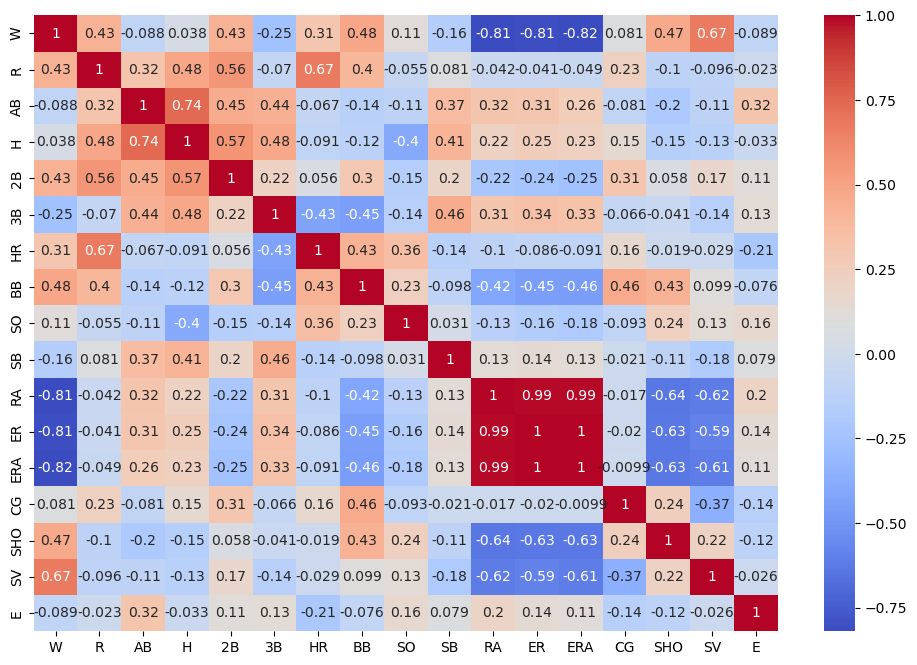

RMSE: 5.2861169592307435
R-squared: 0.7876400316149446


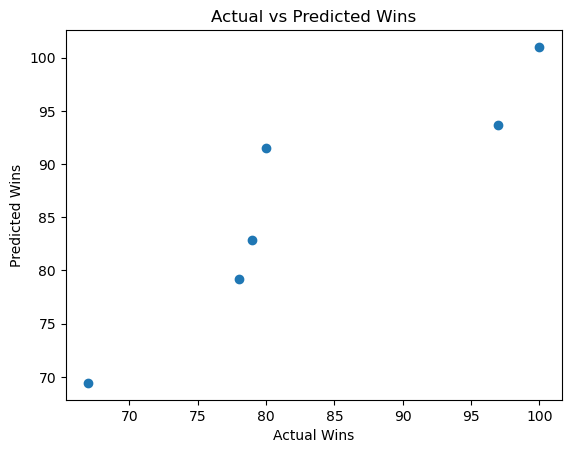

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
url = 'https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv?raw=true'
data = pd.read_csv(url)

# Data exploration
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Drop any columns with missing values (if applicable)
data = data.dropna()

# Correlation matrix to check relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Define input features (X) and target variable (y)
X = data.drop(columns=['W'])  # All columns except Wins
y = data['W']  # Target variable: Wins

# Train-Test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted wins
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')
plt.show()

In [ ]:
Documentation for Baseball Case Study Project:
1. Project Objective:
The goal is to predict the number of wins for a baseball team in the 2015 season using data from the 2014 Major League Baseball season. The dataset includes various statistics (like runs, hits, home runs) as features.

2. Steps Involved:
Data Loading:

The dataset is loaded from a URL in CSV format using pandas.
Data Exploration:

Display basic information like column names, data types, and a description of numerical columns.
Visualize the correlation matrix using a heatmap to understand relationships between features.
Data Preprocessing:

Check for missing values, and handle them if necessary (in this case, dropping rows with NaNs).
Feature and Target Variables:

Input features (X) include all columns except W (Wins).
The target variable (y) is the W column, which represents the number of wins.
Train-Test Split:

Split the data into training and testing sets (80% training, 20% testing).
Model Building:

A Linear Regression model is trained using the training data.
Reason for this model:
    The Linear Regression model was chosen for this project because it is one of the simplest and most interpretable 
    machine learning algorithms that can be used for regression tasks, where the goal is to predict a continuous 
    target variable (in this case, the number of wins).
Model Evaluation:

Evaluate the model using RMSE (Root Mean Squared Error) and R² (R-squared) score.
Visualize the performance with a scatter plot of actual vs. predicted wins.
3. Evaluation Metrics:
RMSE: Indicates the model's prediction error in terms of wins.
R² Score: Measures how well the model explains the variance in the target variable.
4. Output:
The output consists of RMSE, R², and a scatter plot comparing actual and predicted wins.
